# Zomato Restaurant Analysis

I am going to analyse the restaurants of my city JALANDHAR.

## Data Preparation and Cleaning



In [1]:
import pandas as pd

In [2]:
#reading the csv file.
data=pd.read_csv('zomato_restaurants_in_India.csv') 

#to display all the columns and rows in jupyter .otebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
 

data.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


In [3]:
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [4]:
#selecting a few columns for our analysis.
selected_columns=['res_id', 'name', 'establishment', 'city', 'city_id',
                  'locality',  'country_id', 'cuisines',
                  'average_cost_for_two','price_range', 'currency', 
                  'aggregate_rating', 'delivery','takeaway']

### My city dataset
The whole dataset was for all the zomato restaurants of India. But I would like to analyse the data of my city 'JALANDHAR'.
therefore, filtering the dataset below:

In [5]:
#creating a dataframe df with the selected columns.
df=data[selected_columns]

#filter data(JALANDHAR city)
df=df[df['city']=='Jalandhar']

df.head()

,res_id,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway
90286,18781388,Aar Kay Vaishno Dhaba,['Quick Bites'],Jalandhar,11306,Nakodar Road,1,"North Indian, Desserts",300,1,Rs.,4.3,1,-1
90287,18785685,Food Bazar,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,Fast Food,300,1,Rs.,4.5,1,-1
90288,18801006,Nanak Vegetarian Dhaba,['Quick Bites'],Jalandhar,11306,Adarsh Nagar,1,"North Indian, Chinese",250,1,Rs.,4.1,1,-1
90289,18865377,Maddi Refreshment,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,North Indian,100,1,Rs.,4.6,1,-1
90290,18694099,KFC,['Quick Bites'],Jalandhar,11306,Model Town,1,Fast Food,450,2,Rs.,4.4,1,-1


Lets check for duplicate values

In [6]:
duplicate=df[df.duplicated(subset=['locality','name'])]
duplicate.head()

,res_id,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway
90314,18774396,Baba Chicken,['Quick Bites'],Jalandhar,11306,Model Town,1,North Indian,400,2,Rs.,4.1,1,-1
90340,18820514,Domino's Pizza,['Quick Bites'],Jalandhar,11306,Model Town,1,"Pizza, Fast Food",400,2,Rs.,3.9,-1,-1
90356,18921213,Burger King,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,"Burger, Fast Food, Beverages",500,2,Rs.,4.2,1,-1
90386,18694246,Barbeque Nation,['Casual Dining'],Jalandhar,11306,Model Town,1,North Indian,1800,4,Rs.,4.5,-1,-1
90389,18694174,Papa Whiskey,['Bar'],Jalandhar,11306,Model Town,1,North Indian,1500,4,Rs.,3.8,1,-1


A huge list!!!

'It has many duplicate values (same restaurants are repeated within same location but with different restaurant ids). It is better to remove the duplicates as well as the res_id column.'

In [7]:
#removing duplicates
data_clean=df.drop_duplicates(subset=['locality','name'], keep='first', inplace=False)

#dropping rest_id
data_clean.drop('res_id',axis=1,inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Again check for duplicate values.

In [8]:
duplicate=data_clean[data_clean.duplicated(subset=['locality','name'])]
duplicate

,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway


We see NO DUPLICATE VALUES.

In [9]:
#reset the index
data_clean.reset_index(inplace=True,drop=True)


data_clean.head()

,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway
0,Aar Kay Vaishno Dhaba,['Quick Bites'],Jalandhar,11306,Nakodar Road,1,"North Indian, Desserts",300,1,Rs.,4.3,1,-1
1,Food Bazar,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,Fast Food,300,1,Rs.,4.5,1,-1
2,Nanak Vegetarian Dhaba,['Quick Bites'],Jalandhar,11306,Adarsh Nagar,1,"North Indian, Chinese",250,1,Rs.,4.1,1,-1
3,Maddi Refreshment,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,North Indian,100,1,Rs.,4.6,1,-1
4,KFC,['Quick Bites'],Jalandhar,11306,Model Town,1,Fast Food,450,2,Rs.,4.4,1,-1


In [10]:
#CHECH FOR NULL VALUES
for column_name in data_clean.columns:
    if(data_clean[column_name].isnull().values.any()):
        print(column_name)
else:
    print("NO NULL VALUES")

NO NULL VALUES


In [11]:
#check for empty list
data_clean[data_clean['establishment']=='[]'].head()

,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway
6,Deliver My Diet,[],Jalandhar,11306,Model Town,1,"North Indian, Chinese, Continental, Italian, H...",300,1,Rs.,4.4,1,-1
18,Yo Pizza,[],Jalandhar,11306,Model Town,1,Pizza,500,2,Rs.,4.2,1,-1
25,The Belgian Waffle Co.,[],Jalandhar,11306,Model Town,1,"Desserts, Beverages",300,1,Rs.,4.4,1,-1
117,UBQ by Barbeque Nation,[],Jalandhar,11306,Model Town,1,North Indian,1000,3,Rs.,3.4,1,-1
181,Amritsari Kulcha Point,[],Jalandhar,11306,Model Town,1,North Indian,100,1,Rs.,3.8,1,-1


In [12]:
data_clean['establishment'].replace('[]','[Not Available]',inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Again check for empty list

In [13]:
#check for empty list
data_clean[data_clean['establishment']=='[]']

,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway


Let us see some useful information.



In [14]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  577 non-null    object 
 1   establishment         577 non-null    object 
 2   city                  577 non-null    object 
 3   city_id               577 non-null    int64  
 4   locality              577 non-null    object 
 5   country_id            577 non-null    int64  
 6   cuisines              577 non-null    object 
 7   average_cost_for_two  577 non-null    int64  
 8   price_range           577 non-null    int64  
 9   currency              577 non-null    object 
 10  aggregate_rating      577 non-null    float64
 11  delivery              577 non-null    int64  
 12  takeaway              577 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 58.7+ KB


In [15]:
data_clean.nunique()

name                    547
establishment            22
city                      1
city_id                   1
locality                 13
country_id                1
cuisines                197
average_cost_for_two     24
price_range               4
currency                  1
aggregate_rating         25
delivery                  3
takeaway                  1
dtype: int64

### DUMMY

We see that the column 'cuisines' and 'establishment' contains a lot of categorical information. Therefore, we should create dummies for them.

In [16]:
dummy_for_cuisines=data_clean['cuisines'].str.get_dummies(', ')

#dummy_for_establishment=pd.get_dummies(data_clean['establishment'])
#dummy_for_establishment.head()

Joining the dummy dataframe with our cleaned dataset...

In [17]:
data_clean=data_clean.join(dummy_for_cuisines)


In [18]:
data_clean.head()

,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway,Afghan,American,Andhra,Asian,BBQ,Bakery,Bar Food,Belgian,Beverages,Biryani,Burger,Cafe,Chinese,Coffee,Coffee and Tea,Continental,Crepes,Desserts,Drinks Only,Egyptian,European,Fast Food,Finger Food,French,Healthy Food,Hyderabadi,Ice Cream,Indian,Italian,Juices,Kebab,Maharashtrian,Mexican,Mithai,Momos,Mughlai,North Indian,Paan,Pakistani,Pizza,Rolls,Salad,Sandwich,South Indian,Spanish,Street Food,Tea,Thai,Vietnamese,Wraps
0,Aar Kay Vaishno Dhaba,['Quick Bites'],Jalandhar,11306,Nakodar Road,1,"North Indian, Desserts",300,1,Rs.,4.3,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Food Bazar,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,Fast Food,300,1,Rs.,4.5,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Nanak Vegetarian Dhaba,['Quick Bites'],Jalandhar,11306,Adarsh Nagar,1,"North Indian, Chinese",250,1,Rs.,4.1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Maddi Refreshment,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,North Indian,100,1,Rs.,4.6,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,KFC,['Quick Bites'],Jalandhar,11306,Model Town,1,Fast Food,450,2,Rs.,4.4,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Exploratory Analysis and Visualization



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [20]:
data_clean.describe()

,city_id,country_id,average_cost_for_two,price_range,aggregate_rating,delivery,takeaway,Afghan,American,Andhra,Asian,BBQ,Bakery,Bar Food,Belgian,Beverages,Biryani,Burger,Cafe,Chinese,Coffee,Coffee and Tea,Continental,Crepes,Desserts,Drinks Only,Egyptian,European,Fast Food,Finger Food,French,Healthy Food,Hyderabadi,Ice Cream,Indian,Italian,Juices,Kebab,Maharashtrian,Mexican,Mithai,Momos,Mughlai,North Indian,Paan,Pakistani,Pizza,Rolls,Salad,Sandwich,South Indian,Spanish,Street Food,Tea,Thai,Vietnamese,Wraps
count,577.0,577.0,577.000000,577.000000,577.000000,577.000000,577.0,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.00000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.00000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,11306.0,1.0,390.467938,1.570191,2.907626,-0.045061,-1.0,0.008666,0.012132,0.001733,0.001733,0.003466,0.062392,0.003466,0.001733,0.100520,0.012132,0.065858,0.038128,0.213172,0.003466,0.001733,0.180243,0.001733,0.090121,0.003466,0.001733,0.001733,0.187175,0.003466,0.003466,0.024263,0.001733,0.051993,0.003466,0.074523,0.010399,0.001733,0.003466,0.003466,0.02773,0.003466,0.019064,0.518198,0.005199,0.001733,0.057192,0.001733,0.022530,0.038128,0.02773,0.001733,0.046794,0.003466,0.003466,0.001733,0.005199
std,0.0,0.0,299.007541,0.718563,1.339404,0.998982,0.0,0.092765,0.109569,0.041631,0.041631,0.058823,0.242075,0.058823,0.041631,0.300953,0.109569,0.248249,0.191672,0.409903,0.058823,0.041631,0.384723,0.041631,0.286604,0.058823,0.041631,0.041631,0.390390,0.058823,0.058823,0.153999,0.041631,0.222206,0.058823,0.262849,0.101530,0.041631,0.058823,0.058823,0.16434,0.058823,0.136869,0.500102,0.071981,0.041631,0.232411,0.041631,0.148529,0.191672,0.16434,0.041631,0.211380,0.058823,0.058823,0.041631,0.071981
min,11306.0,1.0,0.000000,1.000000,0.000000,-1.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11306.0,1.0,200.000000,1.000000,2.900000,-1.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11306.0,1.0,300.000000,1.000000,3.300000,-1.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11306.0,1.0,500.000000,2.000000,3.700000,1.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## A) UNIVARIATE ANALYSIS
### 1. Categorical Variable 

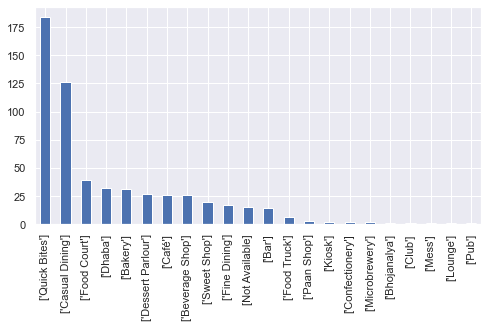

In [21]:
plt.figure(figsize=(8,4))
data_clean['establishment'].value_counts().plot(kind='bar');

Most restaurants in Jalandhar have established as Quick Bites and Casual Dining.
There seem to be very less or negligible restaurants with the establishment of CLUB or PUB.

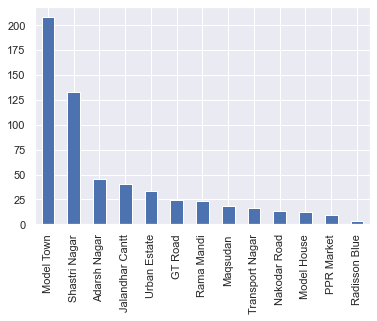

In [22]:
data_clean.locality.value_counts().plot(kind='bar')

The maximum number of restaurants are found in Model Town and Shashtri Nagar.

### 2. Numerical Variable

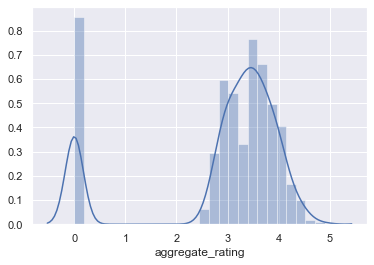

In [23]:
sns.distplot(data_clean.aggregate_rating)

Ignoring the rating of 0, we see the rating range lies between 3 to 4 for most of the restaurants.

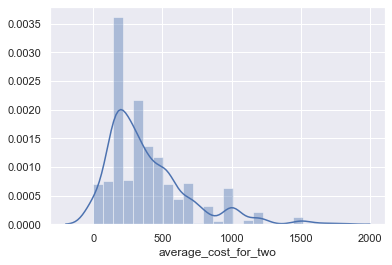

In [24]:
sns.distplot(data_clean.average_cost_for_two)

Most restaurants have average price range below Rs 500, while there are only few restaurants serving food in the range between Rs 1300-2000.

## B) BIVARIATE ANALYSIS
### 1. Numerical-Numerical Variables

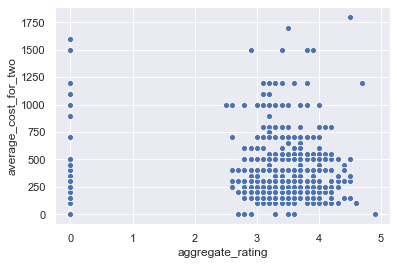

In [25]:
sns.scatterplot(data_clean['aggregate_rating'],data_clean['average_cost_for_two']);

Most restaurants lie in the range of Rs 100 to Rs 800 having rating between 2.5 and 4.5

### 2. Numerical-Categorical Variables

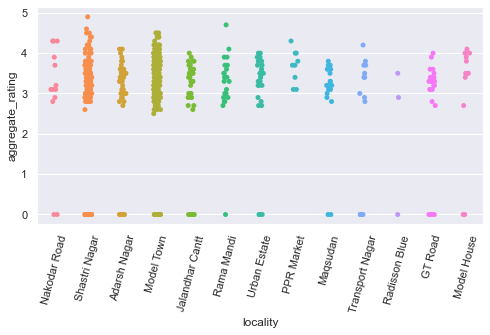

In [26]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=75)

sns.stripplot(x="locality",y="aggregate_rating",data=data_clean)

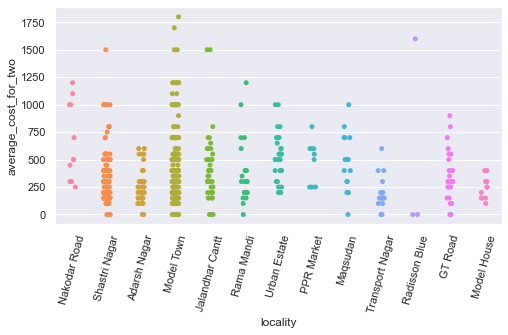

In [27]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=75)
sns.stripplot(x="locality",y="average_cost_for_two",data=data_clean)

# Asking and Answering Questions



### 1) How many restaurants are there per locality in my city?


In [28]:
data_clean.columns

Index(['name', 'establishment', 'city', 'city_id', 'locality', 'country_id',
       'cuisines', 'average_cost_for_two', 'price_range', 'currency',
       'aggregate_rating', 'delivery', 'takeaway', 'Afghan', 'American',
       'Andhra', 'Asian', 'BBQ', 'Bakery', 'Bar Food', 'Belgian', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Coffee', 'Coffee and Tea',
       'Continental', 'Crepes', 'Desserts', 'Drinks Only', 'Egyptian',
       'European', 'Fast Food', 'Finger Food', 'French', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indian', 'Italian', 'Juices', 'Kebab',
       'Maharashtrian', 'Mexican', 'Mithai', 'Momos', 'Mughlai',
       'North Indian', 'Paan', 'Pakistani', 'Pizza', 'Rolls', 'Salad',
       'Sandwich', 'South Indian', 'Spanish', 'Street Food', 'Tea', 'Thai',
       'Vietnamese', 'Wraps'],
      dtype='object')

In [29]:
res_category_per_location=data_clean.groupby('locality')[['Asian', 'BBQ', 'Bakery', 'Bar Food', 'Belgian', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Coffee', 'Coffee and Tea',
       'Continental', 'Crepes', 'Desserts', 'Drinks Only', 'Egyptian',
       'European', 'Fast Food', 'Finger Food', 'French', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indian', 'Italian', 'Juices', 'Kebab',
       'Maharashtrian', 'Mexican', 'Mithai', 'Momos', 'Mughlai',
       'North Indian', 'Paan', 'Pakistani', 'Pizza', 'Rolls', 'Salad',
       'Sandwich', 'South Indian', 'Spanish', 'Street Food', 'Tea', 'Thai',
       'Vietnamese', 'Wraps']].sum()
res_category_per_location.head()

,Asian,BBQ,Bakery,Bar Food,Belgian,Beverages,Biryani,Burger,Cafe,Chinese,Coffee,Coffee and Tea,Continental,Crepes,Desserts,Drinks Only,Egyptian,European,Fast Food,Finger Food,French,Healthy Food,Hyderabadi,Ice Cream,Indian,Italian,Juices,Kebab,Maharashtrian,Mexican,Mithai,Momos,Mughlai,North Indian,Paan,Pakistani,Pizza,Rolls,Salad,Sandwich,South Indian,Spanish,Street Food,Tea,Thai,Vietnamese,Wraps
locality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adarsh Nagar,0,0,3,0,0,4,0,4,0,4,0,0,2,0,3,0,0,0,13,0,0,1,0,3,0,1,1,0,0,0,1,0,1,23,0,0,2,0,1,0,1,0,0,0,0,0,1
GT Road,0,0,2,0,0,0,1,1,0,7,0,0,4,0,1,0,0,0,4,0,0,0,1,0,0,2,0,0,0,0,0,0,0,17,0,0,0,0,0,0,1,0,1,0,0,0,0
Jalandhar Cantt,0,0,1,0,0,5,0,4,2,9,0,0,7,0,4,0,0,0,10,0,0,1,0,3,1,2,0,0,1,0,2,0,2,16,0,0,4,0,1,3,3,1,3,0,0,0,0
Maqsudan,0,0,0,0,0,1,0,1,2,3,0,0,3,0,0,0,0,0,3,0,1,2,0,0,0,1,0,0,0,0,0,0,0,15,0,0,2,0,1,3,0,0,0,0,0,0,0
Model House,0,0,1,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
res_per_location=res_category_per_location.sum(axis=1)
res_per_location


locality
Adarsh Nagar        69
GT Road             42
Jalandhar Cantt     85
Maqsudan            38
Model House         17
Model Town         459
Nakodar Road        25
PPR Market          16
Radisson Blue        5
Rama Mandi          33
Shastri Nagar      220
Transport Nagar     39
Urban Estate        72
dtype: int64

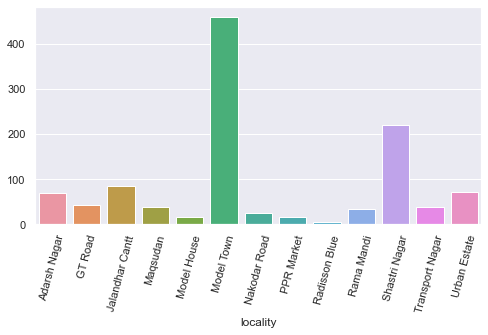

In [31]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=75)
sns.barplot(res_per_location.index,res_per_location);

We see that the max number of restaurants are in the area of "MODEL TOWN" and the count is equal to 438.
The next in the line is the area "SHASTRI NAGAR" and its count is 225.

Let us calculate the percentage of restaurants per location and plot its graph.

In [32]:
percentage_res_per_location=res_per_location*100/(res_per_location.sum())
percentage_res_per_location=percentage_res_per_location.sort_values(ascending=False)
percentage_res_per_location

locality
Model Town         40.982143
Shastri Nagar      19.642857
Jalandhar Cantt     7.589286
Urban Estate        6.428571
Adarsh Nagar        6.160714
GT Road             3.750000
Transport Nagar     3.482143
Maqsudan            3.392857
Rama Mandi          2.946429
Nakodar Road        2.232143
Model House         1.517857
PPR Market          1.428571
Radisson Blue       0.446429
dtype: float64

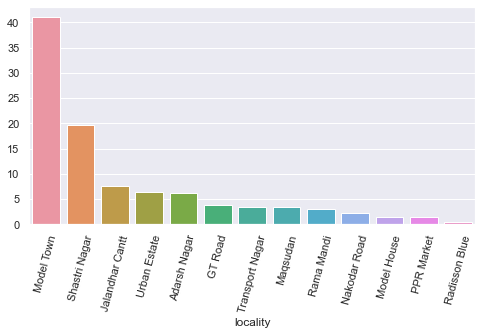

In [33]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=75)
sns.barplot(percentage_res_per_location.index,percentage_res_per_location);

### 2) Which type of food is served the most in jalandhar?

In [34]:
res_category=res_category_per_location.sum()
res_category.head()

Asian        1
BBQ          2
Bakery      36
Bar Food     2
Belgian      1
dtype: int64

In [35]:
percent_category=res_category*100/res_category.sum()
percent_category=percent_category.sort_values(ascending=False)
percent_category.head()

North Indian    26.696429
Chinese         10.982143
Fast Food        9.642857
Continental      9.285714
Beverages        5.178571
dtype: float64

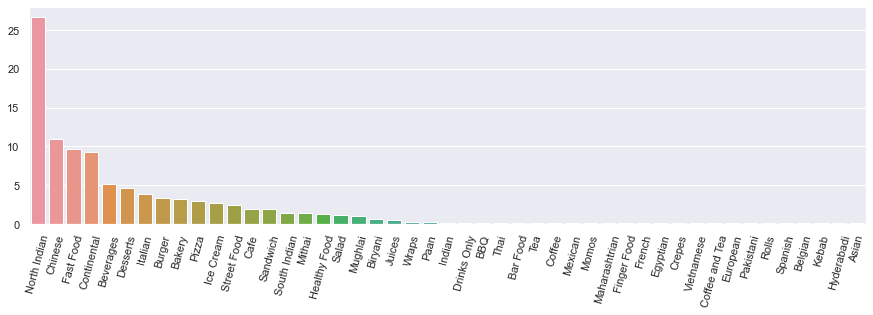

In [36]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=75)
sns.barplot(percent_category.index,percent_category);

It is clear that most restaurants serve North Indian followed by Chinese, Fast Food, Continental.
A few of them serve Beverages, Desserts, Italian, Burger, Pizza, Ice cream, Street food, Sandwich, South Indian etc.
While a neglible number of Restaurants seem to serve BBQ, Bar food, Spanish, Rolls, Asian, etc.
Let us plot its pie chart.

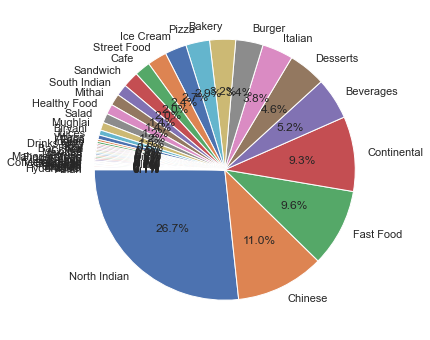

In [37]:
plt.figure(figsize=(12,6))

plt.pie(percent_category, labels=percent_category.index, autopct='%1.1f%%',startangle=180);


Its a mess, but we can clearly see the percentage of North Indian food in Jalandhar.
We can say people here prefer to eat North Indian, followed by a few other categories like Chinese, Fast food,etc.

### 3) Let us assume a poor person wants to go to a sweet shop. Let us find where he can go and afford to buy some sweet.

In [38]:
data_clean.head()

,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway,Afghan,American,Andhra,Asian,BBQ,Bakery,Bar Food,Belgian,Beverages,Biryani,Burger,Cafe,Chinese,Coffee,Coffee and Tea,Continental,Crepes,Desserts,Drinks Only,Egyptian,European,Fast Food,Finger Food,French,Healthy Food,Hyderabadi,Ice Cream,Indian,Italian,Juices,Kebab,Maharashtrian,Mexican,Mithai,Momos,Mughlai,North Indian,Paan,Pakistani,Pizza,Rolls,Salad,Sandwich,South Indian,Spanish,Street Food,Tea,Thai,Vietnamese,Wraps
0,Aar Kay Vaishno Dhaba,['Quick Bites'],Jalandhar,11306,Nakodar Road,1,"North Indian, Desserts",300,1,Rs.,4.3,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Food Bazar,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,Fast Food,300,1,Rs.,4.5,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Nanak Vegetarian Dhaba,['Quick Bites'],Jalandhar,11306,Adarsh Nagar,1,"North Indian, Chinese",250,1,Rs.,4.1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Maddi Refreshment,['Quick Bites'],Jalandhar,11306,Shastri Nagar,1,North Indian,100,1,Rs.,4.6,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,KFC,['Quick Bites'],Jalandhar,11306,Model Town,1,Fast Food,450,2,Rs.,4.4,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
data_clean.establishment.unique()

array(["['Quick Bites']", '[Not Available]', "['Sweet Shop']",
       "['Casual Dining']", "['Bakery']", "['Dhaba']",
       "['Dessert Parlour']", "['Café']", "['Bar']", "['Fine Dining']",
       "['Microbrewery']", "['Club']", "['Pub']", "['Food Court']",
       "['Paan Shop']", "['Beverage Shop']", "['Bhojanalya']",
       "['Food Truck']", "['Confectionery']", "['Kiosk']", "['Lounge']",
       "['Mess']"], dtype=object)

In [40]:
sweet_shop=data_clean[data_clean['establishment']=="['Sweet Shop']"]
sweet_shop.head(1)

,name,establishment,city,city_id,locality,country_id,cuisines,average_cost_for_two,price_range,currency,aggregate_rating,delivery,takeaway,Afghan,American,Andhra,Asian,BBQ,Bakery,Bar Food,Belgian,Beverages,Biryani,Burger,Cafe,Chinese,Coffee,Coffee and Tea,Continental,Crepes,Desserts,Drinks Only,Egyptian,European,Fast Food,Finger Food,French,Healthy Food,Hyderabadi,Ice Cream,Indian,Italian,Juices,Kebab,Maharashtrian,Mexican,Mithai,Momos,Mughlai,North Indian,Paan,Pakistani,Pizza,Rolls,Salad,Sandwich,South Indian,Spanish,Street Food,Tea,Thai,Vietnamese,Wraps
7,Chhabra Sweets & Delights,['Sweet Shop'],Jalandhar,11306,Nakodar Road,1,"Fast Food, Mithai, Desserts, Beverages, North ...",300,1,Rs.,3.9,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


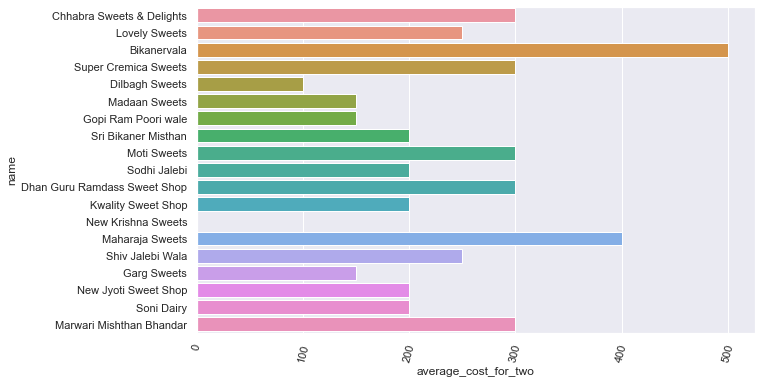

In [41]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
sns.barplot(y=sweet_shop['name'],x=sweet_shop['average_cost_for_two'])

We can say that a poor person can go to DILBAGH SWEETS if he has about Rs. 100.
He can go to MADAAN SWEETS , GOPI RAM POORI WALE , GARG SWEETS if has about Rs.150.
He can go to a few other places where he can get sweets for about Rs. 200.

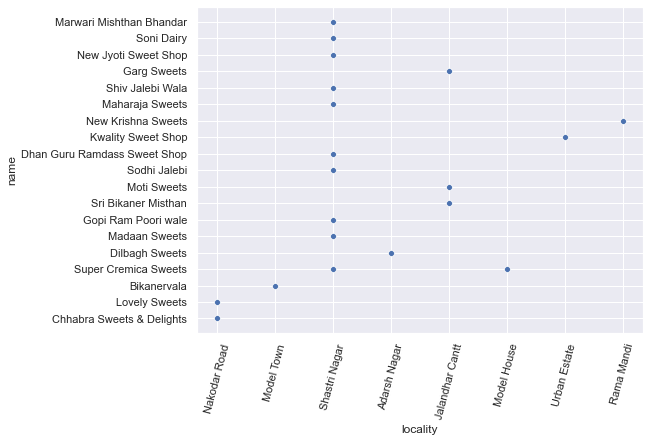

In [42]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
sns.scatterplot(sweet_shop.locality,sweet_shop.name);

He can go to Adarsh Nagar if he wants to spend about Rs.100 in Dilbagh sweets.
And similarly we can tell him about the location he should go according to his pocket.

Another interesting insight is that Shashtri Nagar has the maximum number of sweet shops in Jalandhar.

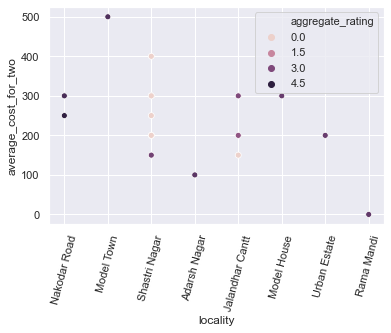

In [43]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=75)
sns.scatterplot(sweet_shop.locality,sweet_shop.average_cost_for_two,hue=sweet_shop.aggregate_rating);

We can tell from the above graph also that he should go to Adarsh Nagar if he wants to spend least money, otherwise he can go to either Shastri Nagar or Jalandhar Cantt. According to the ratings , he should definitely visit Adarsh Nagar as it has the best rating with the cheapest price.

### 4) Describe the distribution of price for the restaurants.

minimum cost =  0


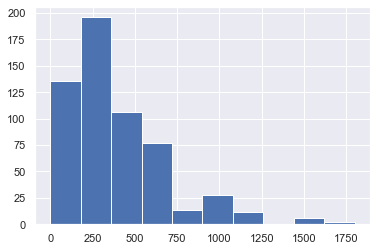

In [44]:

print('minimum cost = ',data_clean.average_cost_for_two.min())
plt.hist(data_clean.average_cost_for_two);


We get to know that the minimum cost is zero, ie, there is missing data.

minimum cost =  100


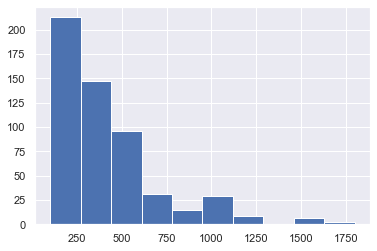

In [45]:
#we are removing restaurants with average_price_for_two=0 to see the distribution;
cost_with_zero=data_clean[data_clean['average_cost_for_two']==0]
cost_without_zero=data_clean.drop(cost_with_zero.index)


print('minimum cost = ',cost_without_zero.average_cost_for_two.min())
plt.hist(cost_without_zero.average_cost_for_two);


We see most restaurants are affordable. The least expensive ones have average price for two persons between Rs100 to 250 and a few other have range between 250 to 500. 

Let us see price range of a few expensive restaurants;

In [46]:
expensive=data_clean[data_clean.average_cost_for_two>=1000]
expensive=expensive.sort_values(by='average_cost_for_two',ascending=False)
expensive.average_cost_for_two.value_counts()

1000    26
1200     9
1500     5
1100     3
1700     1
1800     1
1600     1
Name: average_cost_for_two, dtype: int64

### 5) Top expensive restaurants??

In [47]:
expensive[['name','establishment','average_cost_for_two']].head(10)

,name,establishment,average_cost_for_two
37,Barbeque Nation,['Casual Dining'],1800
97,Sunny Side Up,['Casual Dining'],1700
98,Novel House,['Fine Dining'],1600
60,Papa Whiskey,['Bar'],1500
99,De Nuevo,['Quick Bites'],1500
100,Prithvi's Planet,['Casual Dining'],1500
101,Cafe 181 - Sarovar Portico,['Fine Dining'],1500
102,The Emperor's Court,['Fine Dining'],1500
107,Liquor Adda 5,['Casual Dining'],1200
105,Nigella Resto And Lounge,['Casual Dining'],1200


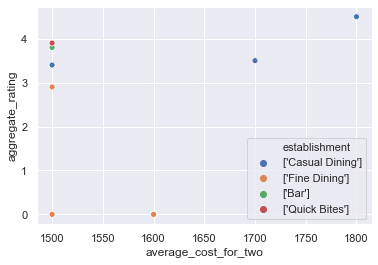

In [48]:
sns.scatterplot(expensive.iloc[0:8].average_cost_for_two,expensive.iloc[0:8].aggregate_rating,hue=expensive.iloc[0:8].establishment)

We see that these top expensive restaurants have pretty good ratings , but the rating for one restaurant is zero(we can ignore it).

### 6) Check for patterns in the price per locality.

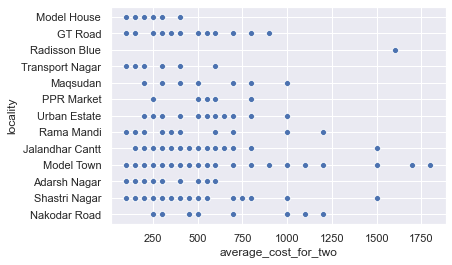

In [49]:
sns.scatterplot(cost_without_zero.average_cost_for_two,cost_without_zero.locality);

There is no particular pattern. But the outliers tell us that most expensive resaturants are in the locality of 'MODEL TOWN','RADISSON BLUE'.

### 7)What is the minimum and the maximum price range for each type of restaurant?

In [50]:
print('Minimum Price range:')
estab=cost_without_zero.groupby(['establishment'])['average_cost_for_two'].min()
estab.to_frame()#.rename(columns={'average_cost_for_two':'Min average_cost_for_two'})

Minimum Price range:


,average_cost_for_two
establishment,
['Bakery'],100
['Bar'],300
['Beverage Shop'],100
['Bhojanalya'],150
['Café'],150
['Casual Dining'],100
['Club'],700
['Confectionery'],150
['Dessert Parlour'],100


In [51]:
print('Maximum Price range:')
estab=cost_without_zero.groupby(['establishment'])['average_cost_for_two'].max()
estab.to_frame().rename(columns={'average_cost_for_two':'Max average_cost_for_two'})

Maximum Price range:


,Max average_cost_for_two
establishment,
['Bakery'],500
['Bar'],1500
['Beverage Shop'],550
['Bhojanalya'],150
['Café'],800
['Casual Dining'],1800
['Club'],700
['Confectionery'],200
['Dessert Parlour'],550


# Inferences and Conclusion



We've drawn many interesting inferences from the data, here's a summary of the few of them:

1) There is an enormous number of the restaurants located in MODEL TOWN.

2) NORTH INDIAN is the most common food served in this city followed by Chinese, Fast Food and Continental.

3) SHASHTRI NAGAR has the maximum number of sweet shops in Jalandhar.

4) A poor person can afford to go to sweet shop DILBAGH SWEETS if he has about Rs. 100 only.

5) The most expensive resaturants are in the locality of 'MODEL TOWN','RADISSON BLUE'.
   The top 3 expensive restaurants are Barbeque Nation, Sunny Side Up, Novel House.

6) Most restaurants have average price range below Rs 700, while there are only few restaurants serving food
   in the range between Rs 1300-2000.The rating range lies between 3 to 4 for most of the restaurants. Most restaurants in          the range of Rs 100 to Rs 800 have rating between 2.5 and 4.5
  
7) Most restaurants in Jalandhar have established as Quick Bites and Casual Dining. There seem to be very less or negligible        restaurants with the establishment of CLUB or PUB.